In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

In [14]:
warnings.filterwarnings('ignore')

In [15]:
data = {
      'CustomerID': range(1, 101),  # Unique ID for each customer
      'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]*10,  # Age of customers
      'MonthlyCharge': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]*10,  # Monthly bill amount
      'CustomerServiceCalls': [1, 2, 3, 4, 0, 1, 2, 3, 4, 0]*10,  # Number of customer service calls
      'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']*10  # Churn status
}
df = pd.DataFrame(data)

In [16]:
X = df[['Age', 'MonthlyCharge', 'CustomerServiceCalls']]
y = df['Churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 1.0


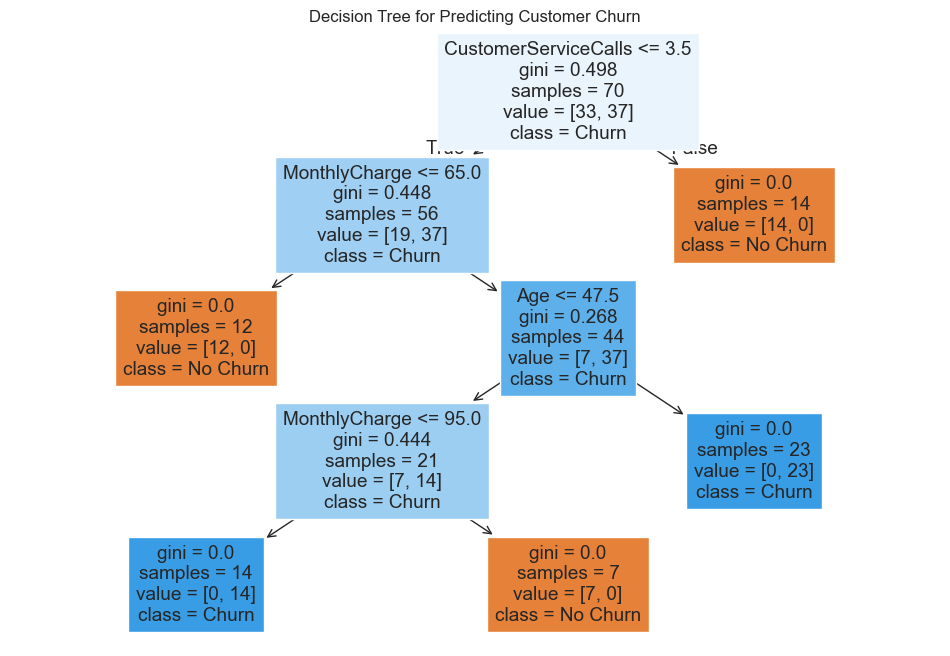

In [20]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'], class_names=['No Churn', 'Churn'])
plt.title('Decision Tree for Predicting Customer Churn')
plt.show()

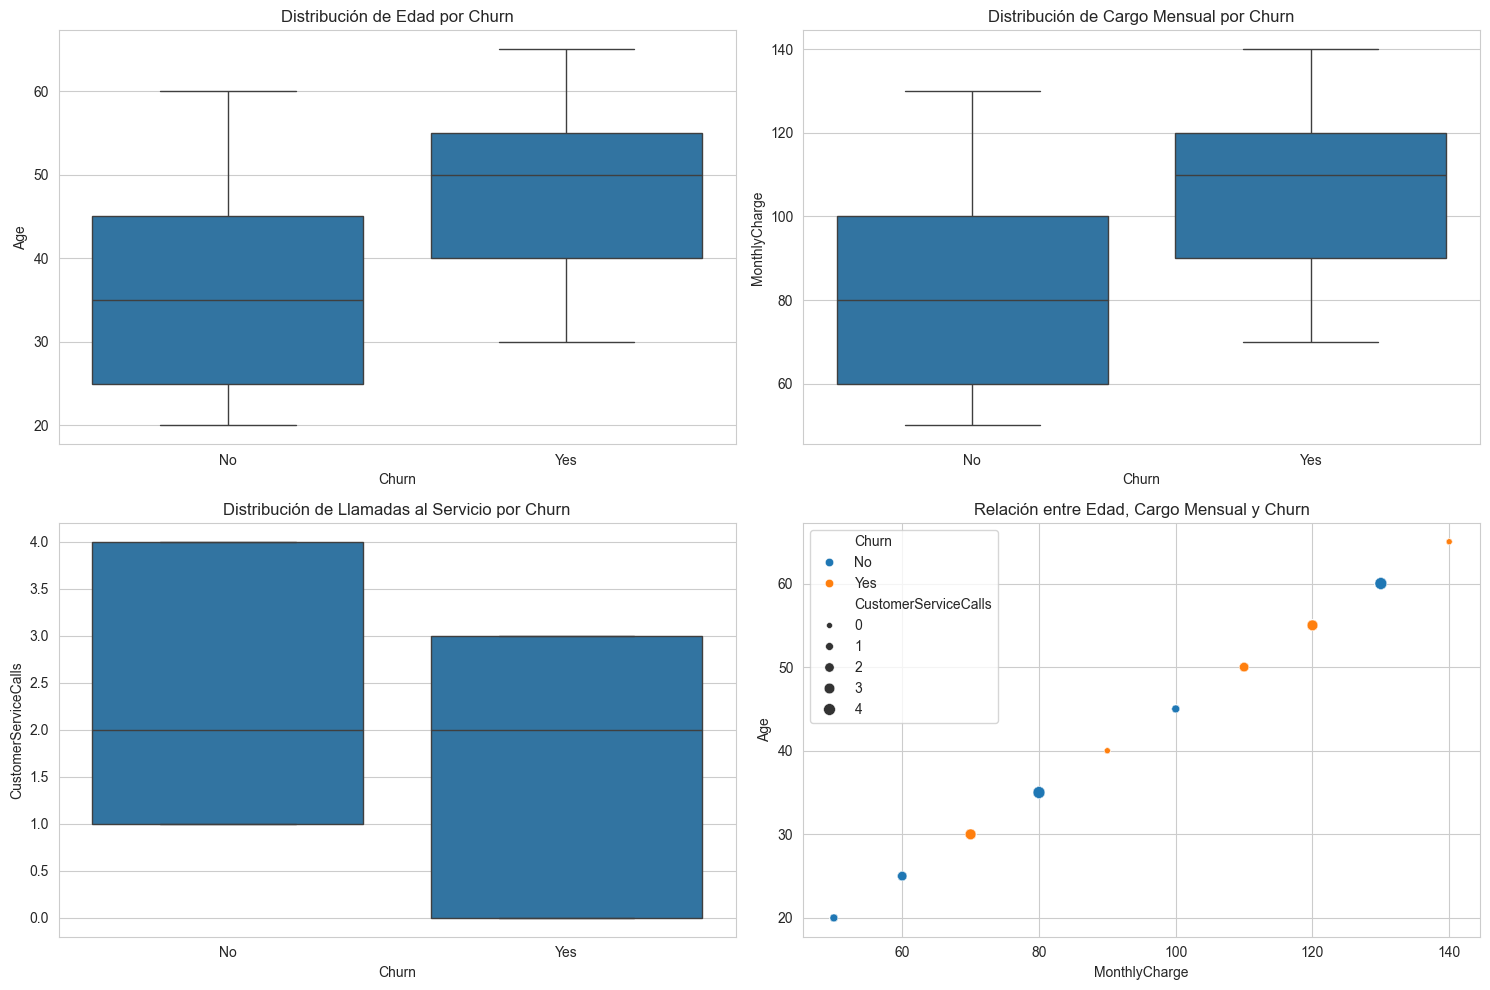

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Creamos un subplot con 2 filas y 2 columnas
plt.subplot(2, 2, 1)
sns.boxplot(x='Churn', y='Age', data=df)
plt.title('Distribución de Edad por Churn')

plt.subplot(2, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharge', data=df)
plt.title('Distribución de Cargo Mensual por Churn')

plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='CustomerServiceCalls', data=df)
plt.title('Distribución de Llamadas al Servicio por Churn')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='MonthlyCharge', y='Age', hue='Churn', size='CustomerServiceCalls')
plt.title('Relación entre Edad, Cargo Mensual y Churn')

plt.tight_layout()
plt.show()

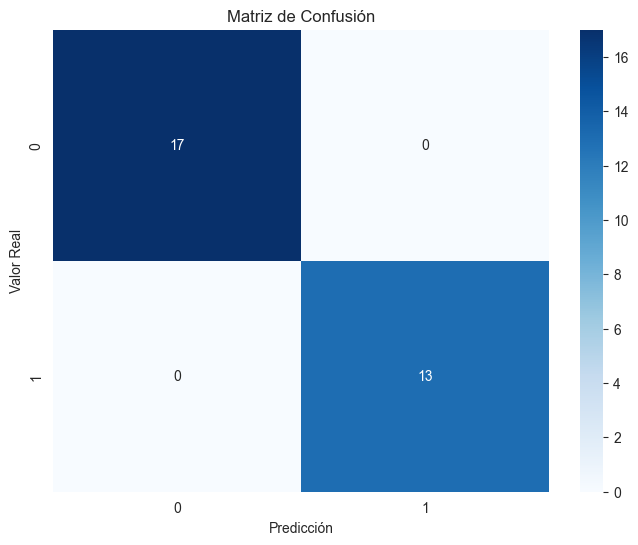

In [22]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

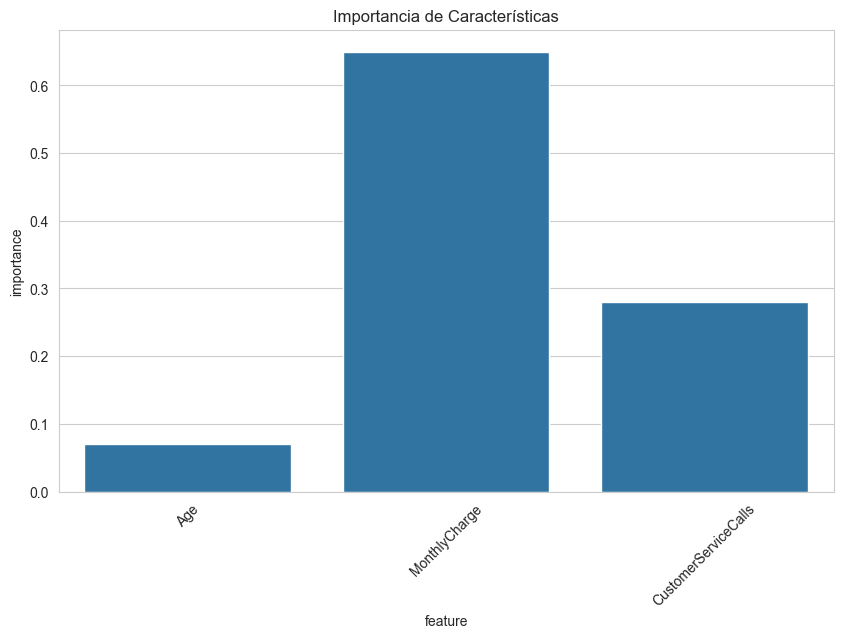

In [23]:
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': ['Age', 'MonthlyCharge', 'CustomerServiceCalls'],
    'importance': clf.feature_importances_
})
sns.barplot(x='feature', y='importance', data=feature_importance)
plt.title('Importancia de Características')
plt.xticks(rotation=45)
plt.show()

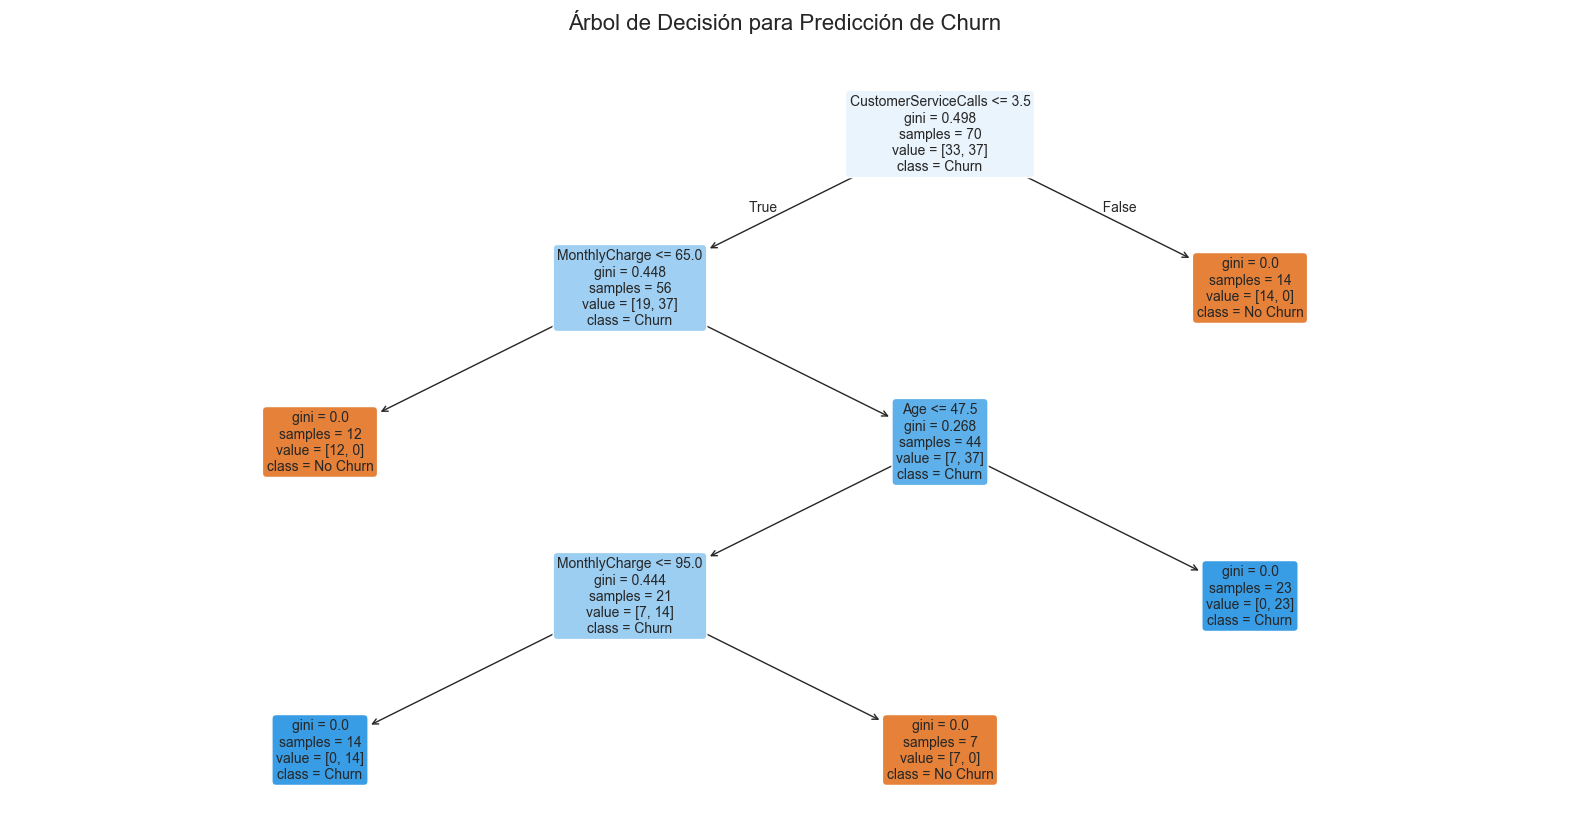

In [24]:
plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'],
          class_names=['No Churn', 'Churn'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Árbol de Decisión para Predicción de Churn', fontsize=16, pad=20)

# Aplicar estilo de Seaborn al fondo
sns.set_style("whitegrid")
plt.show()